In [1]:
from model import VQVAE
import torch
from torchvision import datasets

import lightning as L
torch.set_float32_matmul_precision('high')

In [2]:
import matplotlib.pyplot as plt

def show_images(images, n=8):
    fig, ax = plt.subplots(1, n, figsize=(20, 4))
    for i in range(n):
        ax[i].imshow(images[i])
        ax[i].axis("off")
    plt.show()
    

In [16]:
from torchvision import transforms

trainset = datasets.Food101("../data", split="train", download=True,)
testset = datasets.Food101("../data", split="test", download=True,)
def collate_fn(batch):
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
    ])
    
    imgs = [transform(x) for x, _ in batch]
    return torch.stack(imgs)
train_dataloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True, collate_fn=collate_fn, num_workers=8)
test_dataloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, collate_fn=collate_fn, num_workers=8)

In [31]:
vqvae = VQVAE(input_dim=(3, 256, 256), latent_dim=32, num_embeddings=128)

In [32]:
trainer = L.Trainer(max_epochs=3)
trainer.fit(vqvae, train_dataloader, test_dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type         | Params
-------------------------------------------
0 | encoder   | VQVAEEncoder | 2.6 M 
1 | quantizer | Quantizer    | 4.1 K 
2 | decoder   | VQVAEDecoder | 2.0 M 
-------------------------------------------
4.7 M     Trainable params
0         Non-trainable params
4.7 M     Total params
18.731    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=3` reached.


In [33]:
test = next(iter(test_dataloader))[:8]

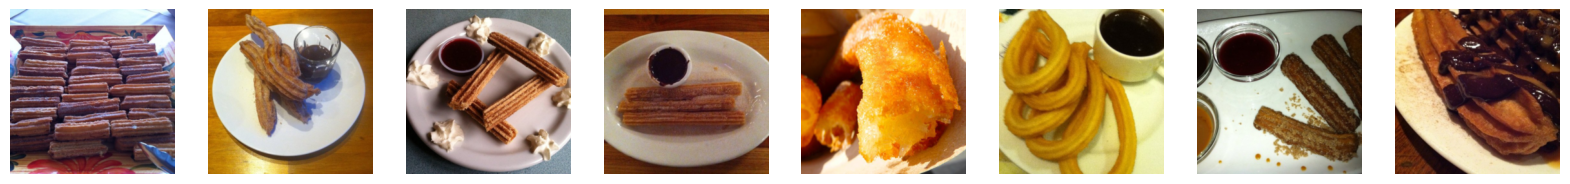

In [34]:
show_images(test.permute(0, 2, 3, 1).numpy())

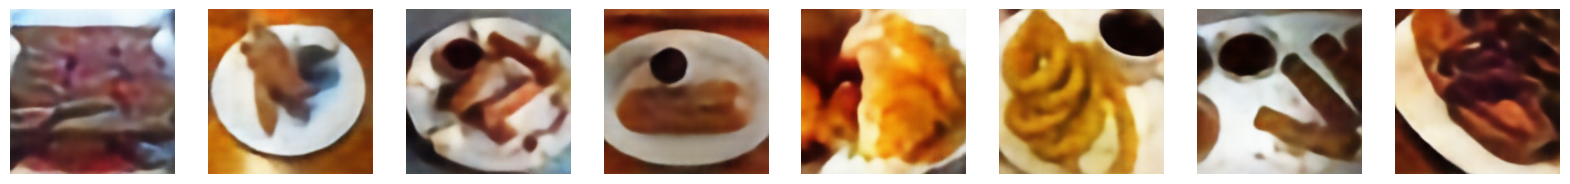

In [35]:
reconstructions = vqvae(test)
show_images(reconstructions[0].permute(0, 2, 3, 1).detach().cpu().numpy())